In [3]:
#Important Libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data colloction and analysis

In [4]:
# load data set
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check the n0. of rows and columns in the data set
df.shape

(1338, 7)

In [7]:
# let us know the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data analysis

In [10]:
# statical measure of data set
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


we have 3 catagorical features.
1- sex
2- smoker
3 - region

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


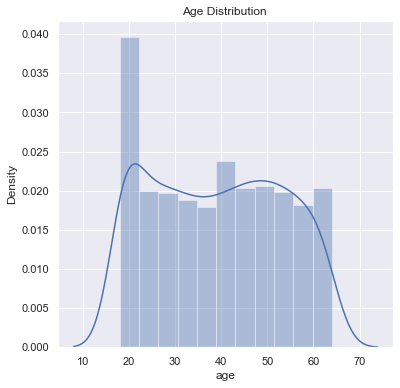

In [27]:
#distribution of age value
sns.set()
plt.figure(figsize= (6,6))
sns.distplot (df['age'])
plt.title("Age Distribution ")
plt.show()

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


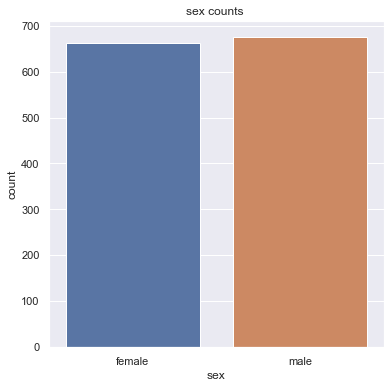

In [26]:
#count of gender value
sns.set()
plt.figure(figsize= (6,6))
sns.countplot (df['sex'])
plt.title("sex counts ")
plt.show()

In [25]:
# count the value of sex
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


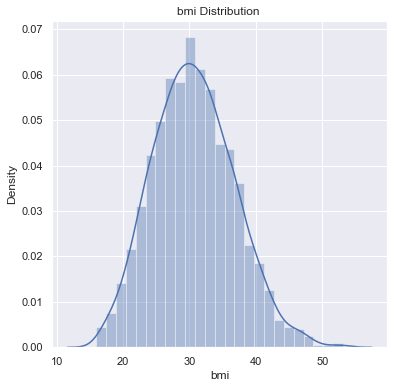

In [28]:
#distribution of bmi value
sns.set()
plt.figure(figsize= (6,6))
sns.distplot (df['bmi'])
plt.title("bmi Distribution ")
plt.show()

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


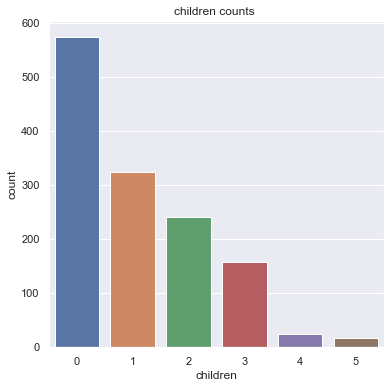

In [29]:
#count of children value
sns.set()
plt.figure(figsize= (6,6))
sns.countplot (df['children'])
plt.title("children counts ")
plt.show()

In [30]:
# count the value of children
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


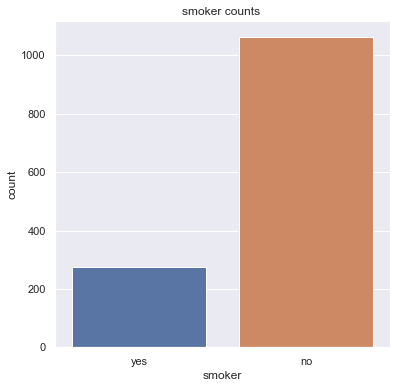

In [31]:
#count of smoker value
sns.set()
plt.figure(figsize= (6,6))
sns.countplot (df['smoker'])
plt.title("smoker counts ")
plt.show()

In [32]:
# count the value of smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


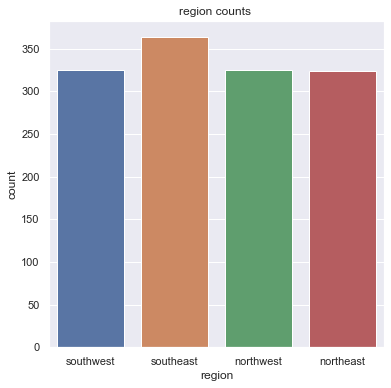

In [33]:
#count of region value
sns.set()
plt.figure(figsize= (6,6))
sns.countplot (df['region'])
plt.title("region counts ")
plt.show()

In [34]:
# count the value of region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


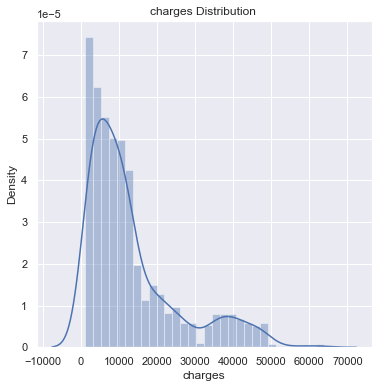

In [35]:
#distribution of charges value
sns.set()
plt.figure(figsize= (6,6))
sns.distplot (df['charges'])
plt.title("charges Distribution ")
plt.show()

# Data pre-processing

encoding the catagorical features,bcoz machine will only takes values in o and 1.

In [38]:
# encoding sex coulmn
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [39]:
# encoding smoker coulmn
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [40]:
# encoding region coulmn
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [42]:
# separate the data and Label
x=df.drop('charges', axis=1)

In [43]:
y= df['charges']

In [44]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [45]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train&Test Split

In [46]:
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2, random_state=2)

In [47]:
# now check the shape of the data
print(x.shape, x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# model training

linear regression

In [48]:
rg=LinearRegression()

In [49]:
# fit the train data
rg.fit(x_train,y_train)

LinearRegression()

model evalution

In [54]:
# prediction on training data
y_prediction_train=rg.predict(x_train)

In [55]:
# R squred value
r2_train=metrics.r2_score(y_train,y_prediction_train)

In [56]:
print('r2 score  : ',r2_train)

r2 score  :  0.751505643411174


In [57]:
# prediction on testing data
y_prediction_test=rg.predict(x_test)

In [59]:
# R squred value
r2_test=metrics.r2_score(y_test,y_prediction_test)

In [60]:
print('r2 score  : ',r2_test)

r2 score  :  0.7447273869684076


In [65]:
#Building a Predictive System
input_data=(31,1,25.74,0, 1,0)
#changing input data to a numpy array
input_data_as_numpy_array =np.asarray(input_data)
# reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction =rg.predict(input_data_reshaped)
print(prediction)

[27688.18228711]


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
